# Analyse exploratoire des données (EDA)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [4]:
# Chargement du dataset
file_path = "data/dataset.csv"
file_path = "/content/dataset.csv"

In [5]:
# Lecture du fichier CSV
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("Fichier introuvable.")

In [6]:
# Affichage des 5 premières lignes
print("Aperçu du dataset :")
print(df.head())

Aperçu du dataset :
                                                text  humor
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False
1  Watch: darvish gave hitter whiplash with slow ...  False
2  What do you call a turtle without its shell? d...   True
3      5 reasons the 2016 election feels so personal  False
4  Pasco police shot mexican migrant from behind,...  False


In [7]:
# Ajout d'une colonne nettoyée pour l'analyse
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['text_clean'] = df['text'].apply(clean_text)

print("Aperçu du dataset :")
print(df.head())

Aperçu du dataset :
                                                text  humor  \
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False   
1  Watch: darvish gave hitter whiplash with slow ...  False   
2  What do you call a turtle without its shell? d...   True   
3      5 reasons the 2016 election feels so personal  False   
4  Pasco police shot mexican migrant from behind,...  False   

                                          text_clean  
0       joe biden rules out  bid guys im not running  
1  watch darvish gave hitter whiplash with slow p...  
2   what do you call a turtle without its shell dead  
3            reasons the  election feels so personal  
4  pasco police shot mexican migrant from behind ...  


In [8]:
# Longueur des textes
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

print("Aperçu du dataset :")
print(df.head())

Aperçu du dataset :
                                                text  humor  \
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False   
1  Watch: darvish gave hitter whiplash with slow ...  False   
2  What do you call a turtle without its shell? d...   True   
3      5 reasons the 2016 election feels so personal  False   
4  Pasco police shot mexican migrant from behind,...  False   

                                          text_clean  text_length  
0       joe biden rules out  bid guys im not running           10  
1  watch darvish gave hitter whiplash with slow p...            8  
2   what do you call a turtle without its shell dead           10  
3            reasons the  election feels so personal            8  
4  pasco police shot mexican migrant from behind ...           10  


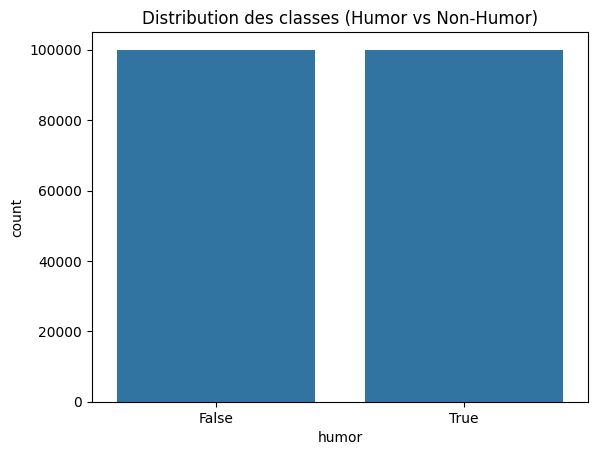

In [9]:
# Distribution des classes
sns.countplot(data=df, x='humor')
plt.title("Distribution des classes (Humor vs Non-Humor)")
plt.show()

<ipython-input-10-c5089a7bfb65>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Humor')


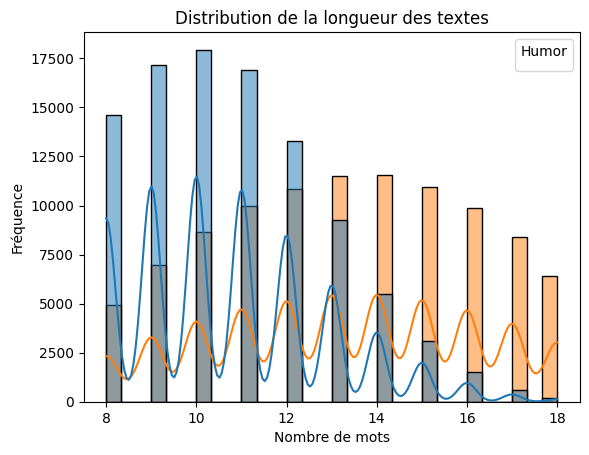

In [10]:
# Distribution de la longueur des textes
sns.histplot(data=df, x='text_length', hue='humor', kde=True, bins=30)
plt.title("Distribution de la longueur des textes")
plt.xlabel("Nombre de mots")
plt.ylabel("Fréquence")
plt.legend(title='Humor')
plt.show()


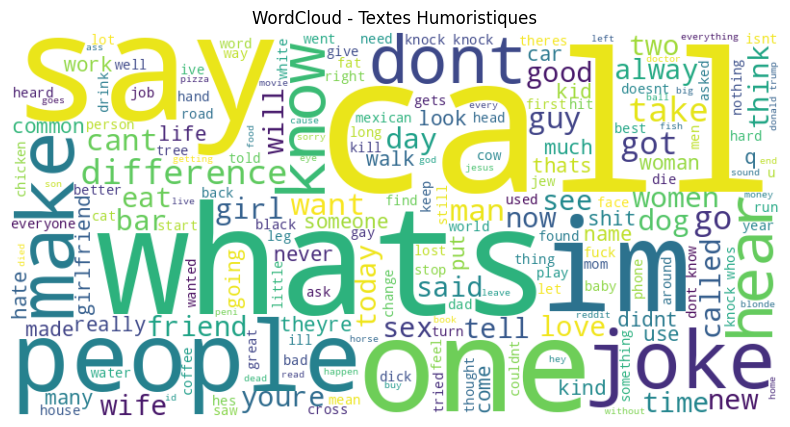

In [11]:
# Nuage de mots pour les textes humoristiques
text_humor = " ".join(df[df['humor'] == True]['text_clean'])
wordcloud_humor = WordCloud(width=800, height=400, background_color='white').generate(text_humor)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_humor, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Textes Humoristiques')
plt.show()


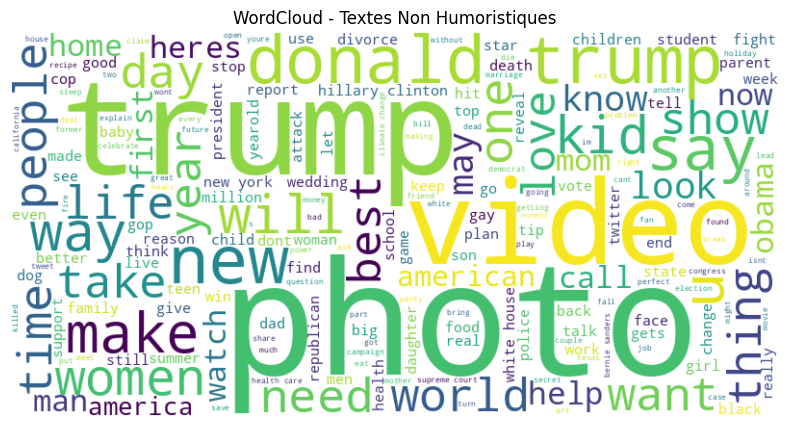

In [12]:
# Nuage de mots pour les textes non humoristiques
text_nonhumor = " ".join(df[df['humor'] == False]['text_clean'])
wordcloud_nonhumor = WordCloud(width=800, height=400, background_color='white').generate(text_nonhumor)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_nonhumor, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Textes Non Humoristiques')
plt.show()


In [13]:
# Aperçu de quelques exemples
pd.set_option('display.max_colwidth', None)
print("\nExemples de textes humoristiques :")
for text in df[df['humor'] == True]['text'].sample(5, random_state=1):
    print("-", text)


Exemples de textes humoristiques :
- Virginity is like a soapbubble, one prick and it is gone.
- What do you call 2 chainz when he gets fat? 2 chinz
- Where do you send bad russian cows? the moolag
- How do you ask a priest to hand you the spaghetti? pasta pasta, pasta.
- There are 10 types if people in the world those who understand binary and those who don't


In [14]:
print("\nExemples de textes non humoristiques :")
for text in df[df['humor'] == False]['text'].sample(3, random_state=1):
    print("-", text)


Exemples de textes non humoristiques :
- Third oakland police chief out in just over a week
- Matzo 'crack' to meringue: 8 easy-to-make passover desserts
- 'the hobbit' poster: gandalf stars in comic-con promo (photo)
